## This work focuses more on modeling and applying the model on a test dataset.
Author: Michael Olusola Adegbenro
#### There are a lot of works on Titianic event that focus on visual presentation and analysis of data but this work focuses more on model training and aplication of trained model. 

- Assumed train dataset is obtained from the client. Train dataset contains both dependent and independent variables
- Train dataset is then used to train a model and the accuracy is check.
- Test dataset is then used to test the model and a new dataset is created for client to make decsion on
- I further confirmed the accuracy of the new dataset obtained from model.

## Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

There are two datasets for the project. Test and Train Dataset.
- I will use Train dataset (trainset) for model training
- Confirm the accuracy of the model
- Then deploy the model on Test dataset (testset) as a fresh new set for confirming the model functionality

In [2]:
# load the trainset for modeling
trainset = pd.read_csv("train.csv")

In [3]:
# confirm the columns
print(trainset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# drop irrelevant columns and check what is left
trainset = trainset.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

trainset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# check for null/empty cell

trainset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
# remove the empty cells

trainset.dropna(inplace=True)
trainset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
# confirm the data type and encode the categorical varables

print(trainset.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [8]:
# encode the categorical data (Sex and Embarked are the only ones to convert)

from sklearn.preprocessing import LabelEncoder,StandardScaler
enco = LabelEncoder()
trainset['Sex'] = enco.fit_transform(trainset['Sex'])
trainset['Embarked'] = enco.fit_transform(trainset['Embarked'])

<AxesSubplot:>

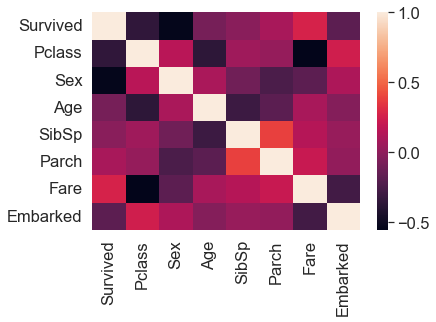

In [9]:
sns.heatmap(trainset.corr())

In [10]:
# check columns
trainset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [11]:
# Split trainset to X (features/independent varables) and y (label/dependent varables)

X = trainset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = trainset.Survived

In [12]:
# Split to train and test 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [13]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(534, 7) (534,)
(178, 7) (178,)


In [14]:
# apply Logistic Regression Model

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# Predict the independent varaible 
y_pred = classifier.predict(x_test)

In [16]:
metrics.confusion_matrix(y_test,y_pred)

array([[85, 17],
       [19, 57]], dtype=int64)

In [17]:
# Check model accuracy

acc=metrics.accuracy_score(y_test,y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 79.78%


## Apply the model to a new dataset - here we use "testset"/"test.csv"

In [18]:
# Load the data

testset = pd.read_csv("test.csv")

In [19]:
# like what i did with trainset drop irrelevant data and check what is left
testset = testset.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [20]:
# check for null/empty cell

testset.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [21]:
# remove the empty cells

testset.dropna(inplace=True)
testset.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
testset.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [23]:
# encode the categorical data (Sex and Embarked are the only ones to convert)
from sklearn.preprocessing import LabelEncoder,StandardScaler
enco = LabelEncoder()
testset['Sex'] = enco.fit_transform(testset['Sex'])
testset['Embarked'] = enco.fit_transform(testset['Embarked'])

In [24]:
# Predict the independent varaible 
ynew_pred = classifier.predict(testset)

In [25]:
#convert to DataFrame
ynew_pred = pd.DataFrame(ynew_pred)

#Add column name to the dataframe
ynew_pred.columns = ['Survived']

In [26]:
# combine testset with the predicted values to make it look like data used for trainset and call it NewSet
result = pd.concat([testset,ynew_pred], axis=1, join='inner')
display(result)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
326,2,0,12.0,2,1,39.0000,2,1
327,1,1,46.0,0,0,79.2000,0,1
328,2,1,29.0,1,0,26.0000,2,1
329,2,1,21.0,0,0,13.0000,2,1


In [27]:
result = result.to_csv("New Result.csv")

NewSet=pd.read_csv("New Result.csv")

<AxesSubplot:>

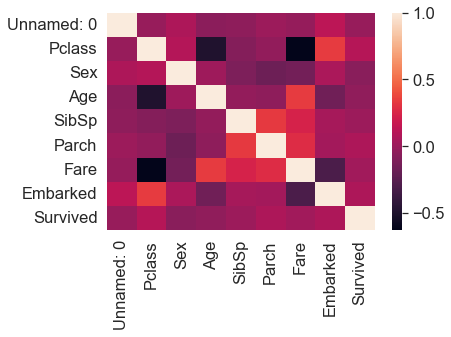

In [29]:
sns.heatmap(NewSet.corr())

## Although not important, I will want to confirm the accuracy of the new dataset containing our predicted dependent varables
- I will simply repeat same process above

In [30]:
# Split trainset to Xnew (features/independent varables) and ynew (label/dependent varables)

Xnew = NewSet[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
ynew = NewSet.Survived

In [31]:
# Split to train and test 

from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(Xnew,ynew,test_size=0.3,random_state=1)

In [32]:
print (x1_train.shape, y1_train.shape)
print (x1_test.shape, y1_test.shape)

(182, 7) (182,)
(78, 7) (78,)


In [33]:
# apply Logistic Regression Model

classifier = LogisticRegression(random_state = 0)
classifier.fit(x1_train, y1_train)

LogisticRegression(random_state=0)

In [34]:
# Predict the independent varaible 
y1_pred = classifier.predict(x1_test)
metrics.confusion_matrix(y1_test,y1_pred)

array([[45, 10],
       [19,  4]], dtype=int64)

In [35]:
# Check model accuracy

acc=metrics.accuracy_score(y1_test,y1_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 62.82%
